# Exploratory Data Analysis of Health Insurance Costs

## Background
This report presents an exploratory data analysis (EDA) of health insurance costs using a dataset containing demographic and health-related information of insurance policyholders. The primary objective of this analysis is to uncover patterns, trends, and relationships within the data, providing valuable insights into the factors influencing insurance charges.

## Objectives
1. To explore the distribution and central tendencies of key variables (age, bmi, charges, etc.).

2. To identify relationships and correlations between variables.

3. To detect and analyze outliers in the dataset.

4. To visualize data patterns and trends using various plots and charts.

5. To derive meaningful insights that can inform future decision-making and policy development in the healthcare insurance sector.

## Research Questions
**What are the primary factors influencing health insurance charges?**

**What trends are observed in charges across different age groups and regions?**

**Are there correlations between BMI, age, and charges?**

## Data Description
The dataset representing the insurance health was found on kaggle.com website, containing 1,338 information about the dataset. It contains age, sex, bmi, children, smoker, region and charges. It was found that it has a few outliers and duplicates which were addressed during the data cleaning process, with zero missing values.

## Methodology
### 1. Data Cleaning:

Handle missing values, duplicates, and inconsistencies to ensure data quality.

### 2. Exploratory Data Analysis (EDA):

Create visualizations (histograms, scatter plots, box plots, heatmaps) to explore patterns, relationships, and trends.

### 3. Outlier Detection:

Identify and analyze outliers in the dataset using appropriate methods.

### 4. Summary and Reporting:

Summarize findings and insights from the analysis, and compile them into a comprehensive report.

## Significance
The analysis provides a deeper understanding of the factors influencing health insurance costs. By identifying key patterns and relationships within the data, we can make informed decisions to improve healthcare insurance policies and strategies.

# NON-TECHNICAL CONTENT

## PRESENTATION
**Click this [Link](https://docs.google.com/presentation/d/1HjbdYHAK7my3-wGOG82Wg04E0KcJ6VIhWLNm_KEhTuk/edit?usp=sharing)**


## > Open the required libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## > Open the insurance dataset

In [59]:
# Import the dataset
df = pd.read_csv('/Users/mac/Documents/Kaggle/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
# Get the number of rows and columns
df.shape

(1338, 7)

In [61]:
# Check the last five rows
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


## > Identify missing values

In [62]:
# Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [65]:
# To check the types of the columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [66]:
# To get the the sum of the columns with missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## > Identify the duplicates

In [67]:
# Check for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 1


In [69]:
# Remove duplicates
df_cleaned = df.drop_duplicates()

# Verify the removal of duplicates
print(f"Number of duplicate rows after removal: {df_cleaned.duplicated().sum()}")

Number of duplicate rows after removal: 0


## > Identify the outliers

In [70]:
# Define a function to identify outliers using the IQR method
def find_outliers_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers in the 'bmi' column
bmi_outliers = find_outliers_IQR(df, 'bmi')
print(f"Number of outliers in 'bmi': {len(bmi_outliers)}")

# Identify outliers in the 'age' column
age_outliers = find_outliers_IQR(df, 'age')
print(f"Number of outliers in 'age': {len(age_outliers)}")

# Identify outliers in the 'charges' column
charges_outliers = find_outliers_IQR(df, 'charges')
print(f"Number of outliers in 'charges': {len(charges_outliers)}")

# Display the outliers in 'charges' for further inspection
print(charges_outliers)


Number of outliers in 'bmi': 9
Number of outliers in 'age': 0
Number of outliers in 'charges': 139
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


In [71]:
# Remove outliers from the bmi column
bmi_Q1 = df['bmi'].quantile(0.25)
bmi_Q3 = df['bmi'].quantile(0.75)
bmi_IQR = bmi_Q3 - bmi_Q1
bmi_lower_bound = bmi_Q1 - 1.5 * bmi_IQR
bmi_upper_bound = bmi_Q3 + 1.5 * bmi_IQR
df_no_outliers_bmi = df[(df['bmi'] >= bmi_lower_bound) & (df['bmi'] <= bmi_upper_bound)]

# Remove outliers from the charges column
charges_Q1 = df['charges'].quantile(0.25)
charges_Q3 = df['charges'].quantile(0.75)
charges_IQR = charges_Q3 - charges_Q1
charges_lower_bound = charges_Q1 - 1.5 * charges_IQR
charges_upper_bound = charges_Q3 + 1.5 * charges_IQR
df_no_outliers = df_no_outliers_bmi[(df_no_outliers_bmi['charges'] >= charges_lower_bound) & (df_no_outliers_bmi['charges'] <= charges_upper_bound)]

print(f"Shape of DataFrame before removing outliers: {df.shape}")
print(f"Shape of DataFrame after removing outliers: {df_no_outliers.shape}")

Shape of DataFrame before removing outliers: (1338, 7)
Shape of DataFrame after removing outliers: (1193, 7)


## > Perform Exploratory Data Analysis

In [72]:
# Get the summary statistics of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


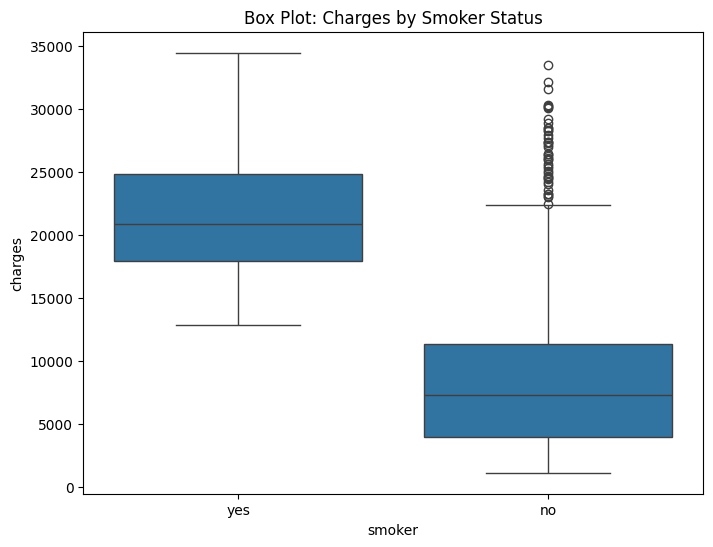

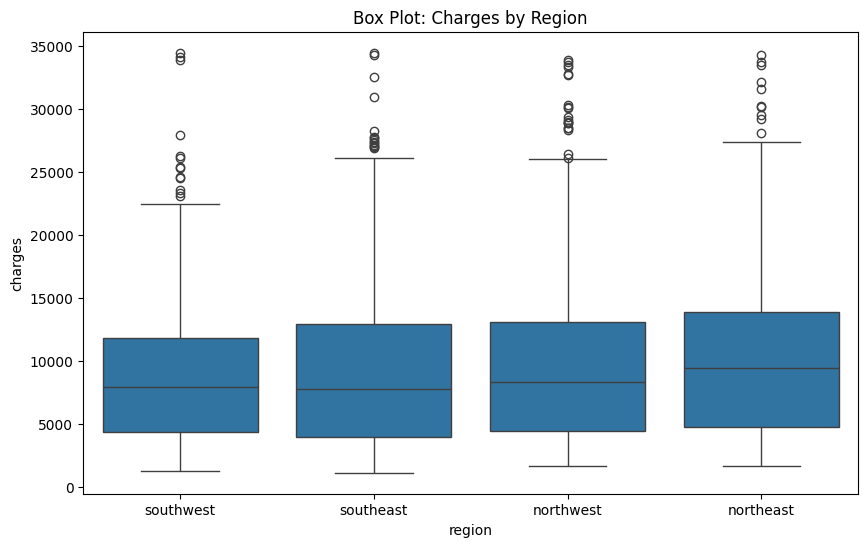

In [73]:
# Box plot for 'charges' by 'smoker' status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_outliers, x='smoker', y='charges')
plt.title('Box Plot: Charges by Smoker Status')
plt.show()

# Box plot for 'charges' by 'region'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, x='region', y='charges')
plt.title('Box Plot: Charges by Region')
plt.show()

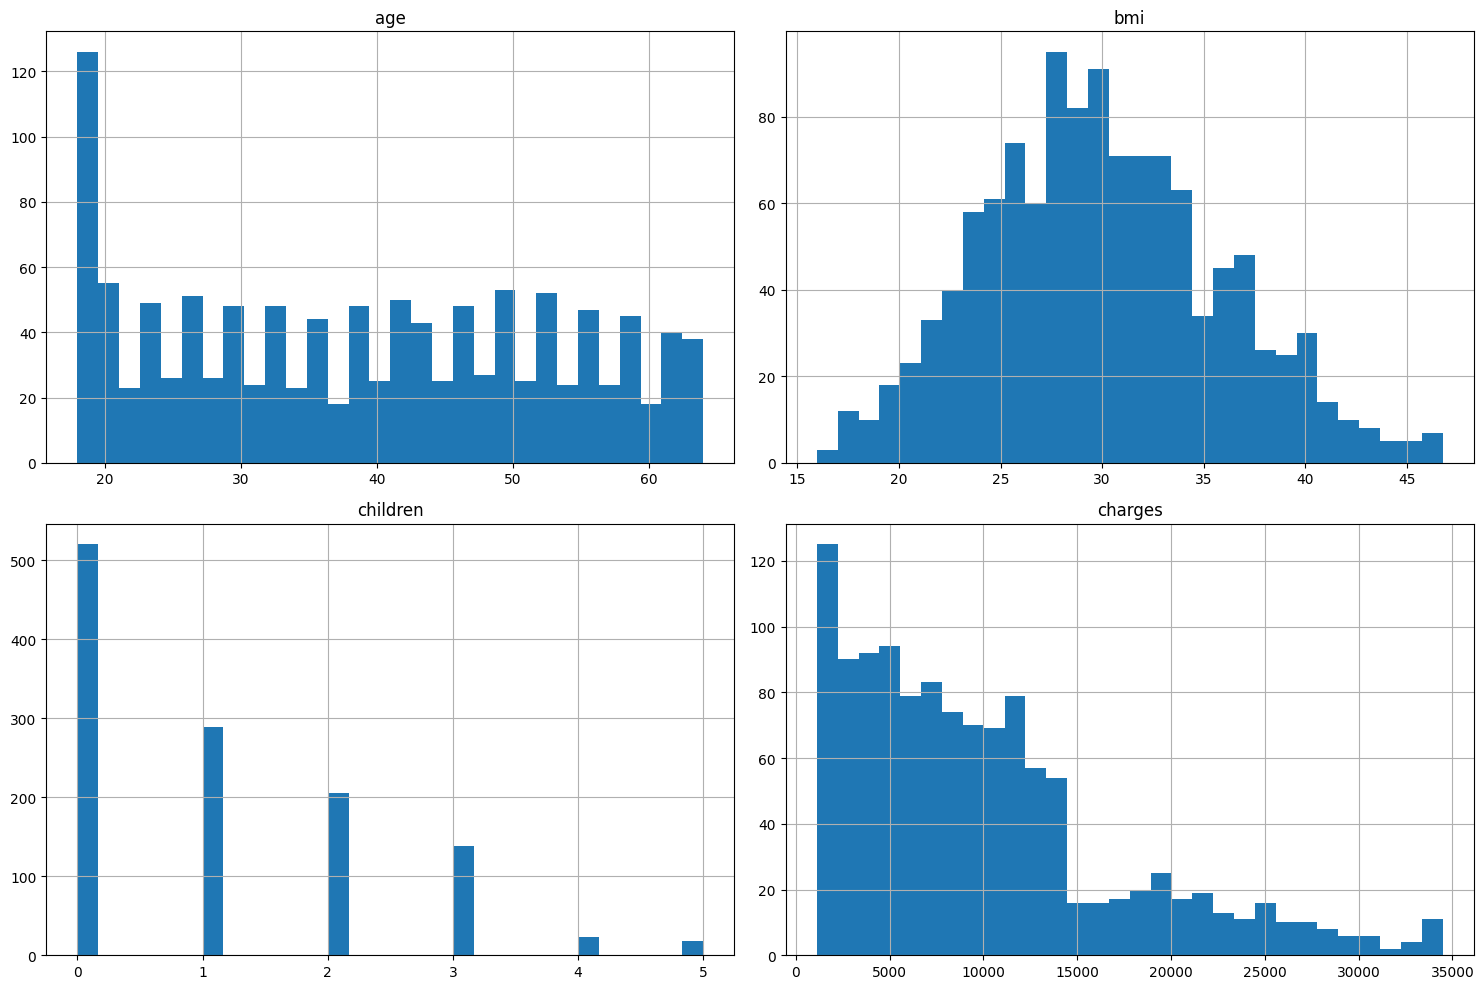

In [74]:
# Create histograms for numerical columns
df_no_outliers.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

## Explanation
**A histogram of charges might show a right-skewed distribution, indicating that most insurance charges are on the lower side, with a few high charges.**

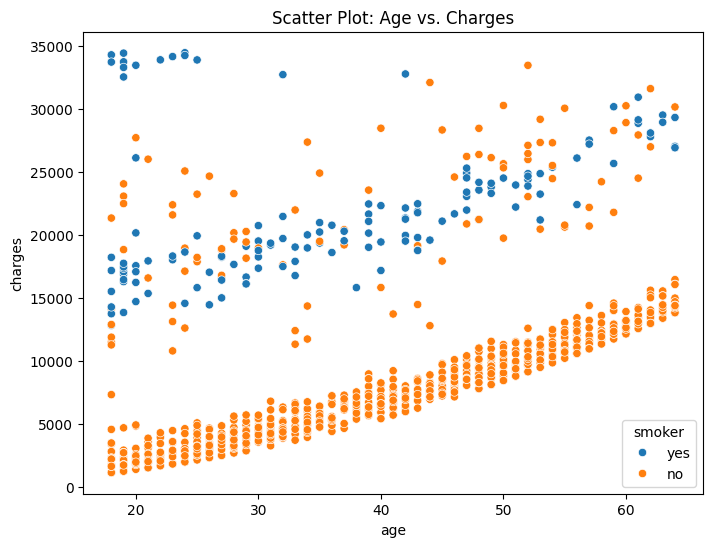

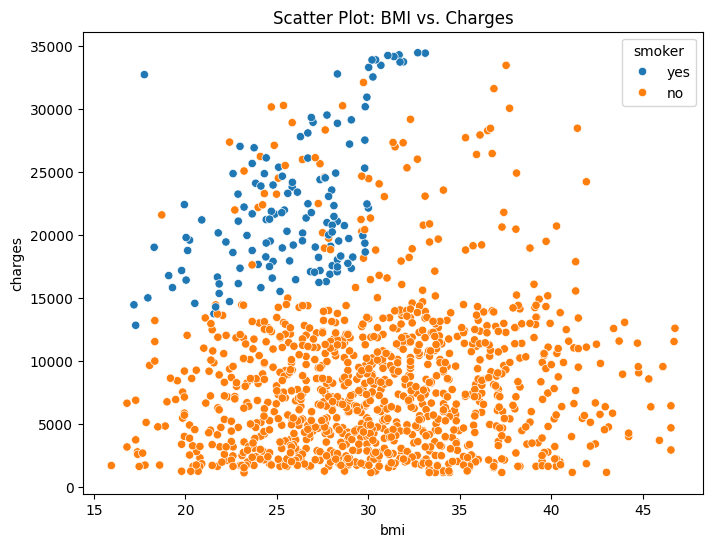

In [75]:
# Scatter plot between 'age' and 'charges'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_no_outliers, x='age', y='charges', hue='smoker')
plt.title('Scatter Plot: Age vs. Charges')
plt.show()

# Scatter plot between 'bmi' and 'charges'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_no_outliers, x='bmi', y='charges', hue='smoker')
plt.title('Scatter Plot: BMI vs. Charges')
plt.show()

## Explanation
**A scatter plot of age vs. charges might reveal a positive correlation, suggesting that insurance charges tend to increase with age.**

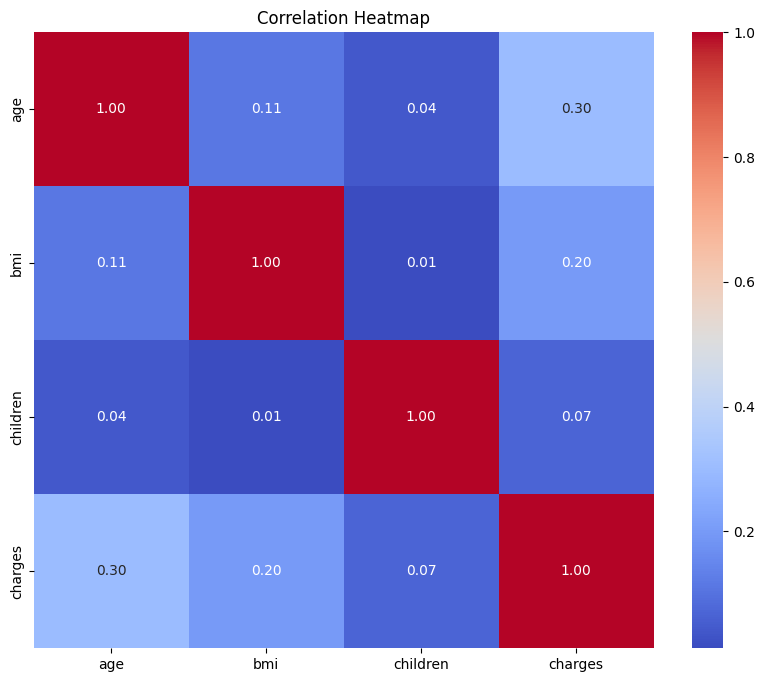

In [76]:
# Select only numeric columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Correlation matrix (specify numeric_only=True to silence the warning)
corr_matrix = numeric_columns.corr(numeric_only=True)

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Explanation
**A heatmap might show a strong positive correlation between bmi and charges, suggesting that higher BMI is associated with higher insurance charges.**

## Summary of Key Findings
1. **Relationship Insights**:
    Positive correlation between age and charges indicates that older policyholders tend to incur higher medical costs. Higher charges are observed among smokers compared to non-smokers, highlighting smoking's impact on insurance costs.
2. **Regional Differences**:
    Significant variation in charges across different regions, with some regions incurring higher costs.
3. **Outliers**:
    Identification of outliers in bmi and charges helped in understanding extreme values and their impact on the dataset.

## Limitations
The dataset may contain inaccuracies or missing information not captured during the cleaning process. Analysis does not account for external variables (e.g., economic conditions, healthcare policies) that could influence insurance costs.

## Implications
Insights can inform healthcare insurance policies by highlighting the impact of age and smoking on insurance costs.Identifying high-risk groups (e.g., smokers, older individuals) allows insurers to design better risk management strategies and personalized plans.

## Future Work
Enrich the analysis by incorporating external data sources to provide a more comprehensive view. 


## References
## **www.Kaggle.com**

In [77]:
# Save the cleaned data to a csv file with the full path
df_no_outliers.to_csv('cleaned_insurance_data.csv', index=False)

print("Data saved successfully as cleaned_insurance_data.csv.")

Data saved successfully as cleaned_insurance_data.csv.
